### Importing libraries and packages to be used in Data Analysis

In [121]:
import pandas as pd
import numpy as np
import seaborn as sns
import xgboost as xgb
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler 
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import average_precision_score, precision_recall_curve, plot_precision_recall_curve
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest

Importing Dataset:

In [122]:
df=pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [123]:
df.shape

(284807, 31)

In [124]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [125]:
df.isnull().values.any()

False

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [127]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

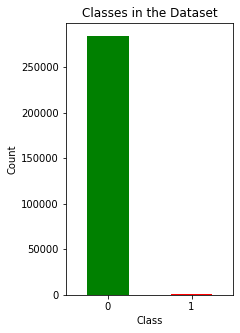

In [136]:
plt.figure(figsize=(3,5))
Result_Bar = df['Class'].value_counts().plot.bar(color=['green', 'red'],title = 'Classes in the Dataset')
Result_Bar.set_xlabel("Class")
Result_Bar.set_ylabel("Count")
Result_Bar.tick_params(labelrotation=360)

In [129]:
print("Good Customers in Data : ", (284315/len(df)) * 100 , " %")

Good Customers in Data :  99.82725143693798  %


In [130]:
print("Fraud Customers in Data : ", (492/len(df)) * 100 , " %")

Fraud Customers in Data :  0.1727485630620034  %


From above we can see that data is very imbalance

Distribution of fraud and normal transactions in data

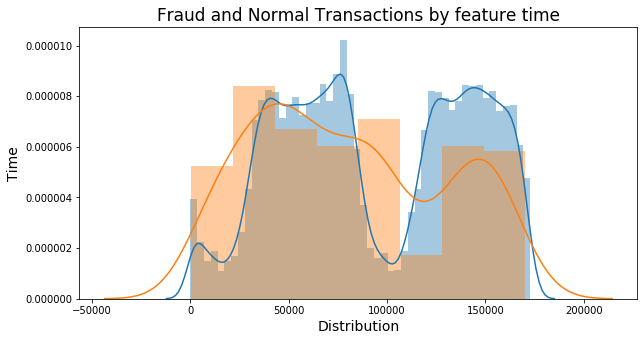

In [134]:
plt.figure(figsize=(10,5))

sns.distplot(df.loc[df['Class'] == 0]["Time"], label = "Fraud")
sns.distplot(df.loc[df['Class'] == 1]["Time"], label = "Normal")
plt.title('Fraud and Normal Transactions by feature time', fontsize=17)
plt.ylabel('Time',size=14)
plt.xlabel('Distribution',size=14)
plt.show()
#sns.plt.legend()

distribution of time and amount features

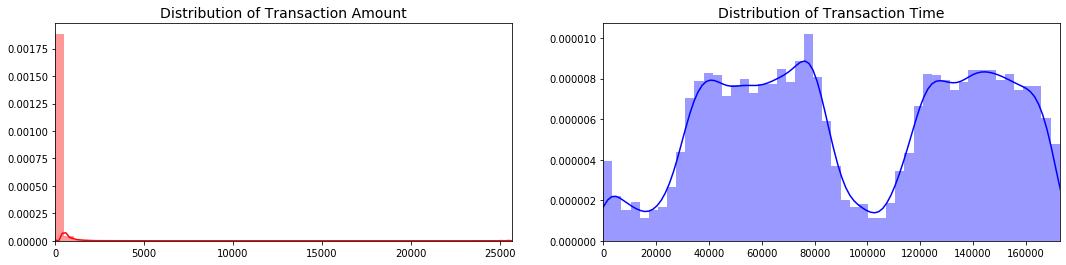

In [135]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val =df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])
plt.show()

Correlation between the features

Text(0.5, 1, 'Correlation betweent the variables')

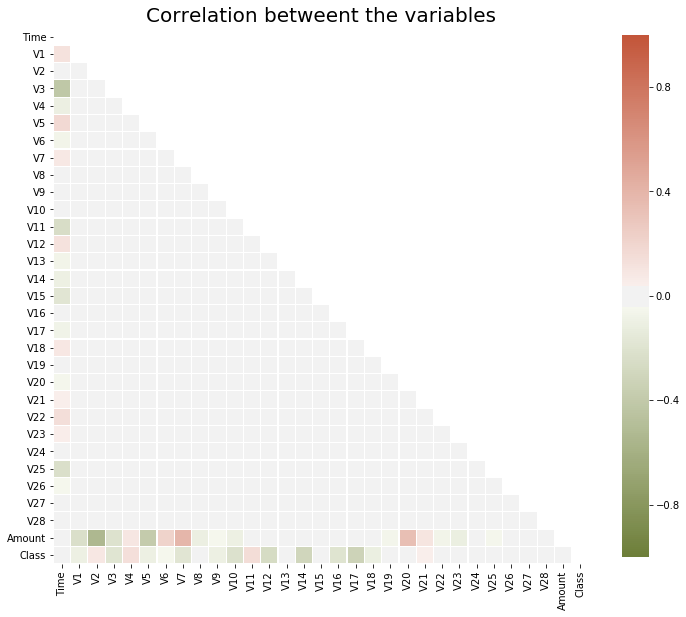

In [138]:
# Generate a mask for the upper triangle
corr= df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12, 12))

cmap = sns.diverging_palette(100,20,as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=0.2, cbar_kws={"shrink": 0.8});
plt.title('Correlation betweent the variables', fontsize=20)

From above we see there is not much correlation between the features.

------------------------------------------

# PREPROCESSING THE DATA:
Standardization of column "Amount" and "Time

In [11]:
ss = StandardScaler()
df['Amount_SS'] = ss.fit_transform(df['Amount'].values.reshape(-1,1))
df['Time_SS'] = ss.fit_transform(df['Time'].values.reshape(-1,1))
df.drop(['Time', 'Amount'], axis=1, inplace=True)

Defining our target variable which is class
Moving target value to y and rest of the data to X

In [12]:
X = df.drop(["Class"], axis=1)
Y = df["Class"].values

Spliting the data set:

Training set : 70%  ;  Validation set : 10%   ;   Testing set : 20%

In [13]:
#First spliting the data into 70% training and keeping the 30% in other
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=7)

#Spliting the other 30% data into testing 20% and validation 10%
X_test, X_val, Y_test, Y_val = train_test_split(X_test, Y_test, test_size=0.33, random_state=7)

In [14]:
#printing the shape of the datasets
print("Rows and columns in training sets: " , X_train.shape, Y_train.shape)
print("Rows and columns in testing sets: " , X_test.shape, Y_test.shape)
print("Rows and columns in validation sets: " , X_val.shape, Y_val.shape)

Rows and columns in training sets:  (199364, 30) (199364,)
Rows and columns in testing sets:  (57246, 30) (57246,)
Rows and columns in validation sets:  (28197, 30) (28197,)


-------------------------------------------------------
### RANDOM FOREST After PREPROCESSING

In [15]:
RF1 = RandomForestClassifier().fit(X_train, Y_train)

Predicting targets on testing data

In [16]:
Y_Test_Pred_RF1 = RF1.predict(X_test)

In [103]:
#metrix for Random Forest on test data

#Accuracy_LR1 = LR1.score(X_test, Y_test)
print("Accuracy of Random Forest on Testing data : ", accuracy_score(Y_test, Y_Test_Pred_RF1))
print("Precision of Random Forest on Testing data : ", precision_score(Y_test, Y_Test_Pred_RF1))
print("Recall of Random Forest on Testing data : ", recall_score(Y_test, Y_Test_Pred_RF1))
print("F1 score of Random Forest on Testing data : ", f1_score(Y_test, Y_Test_Pred_RF1))
print("Error rate of Random Forest on Testing data : ", 1 - accuracy_score(Y_test, Y_Test_Pred_RF1))


#CM_LR1 = confusion_matrix(Y_test, Y_Test_Pred1)
print("Confusion matrix : \n", confusion_matrix(Y_test, Y_Test_Pred_RF1))

Accuracy of Random Forest on Testing data :  0.9996331621423331
Precision of Random Forest on Testing data :  0.9438202247191011
Recall of Random Forest on Testing data :  0.84
F1 score of Random Forest on Testing data :  0.888888888888889
Error rate of Random Forest on Testing data :  0.0003668378576668907
Confusion matrix : 
 [[57141     5]
 [   16    84]]


Predicting targets on Validation data

In [18]:
Y_val_Pred_RF1 = RF1.predict(X_val)

In [104]:
#metrix for Random Forest on Validataion data

#Accuracy_LR1 = LR1.score(X_test, Y_test)
print("Accuracy of Random Forest on Testing data : ", accuracy_score(Y_val, Y_val_Pred_RF1))
print("Precision of Random Forest on Testing data : ", precision_score(Y_val, Y_val_Pred_RF1))
print("Recall of Random Forest on Testing data : ", recall_score(Y_val, Y_val_Pred_RF1))
print("F1 score of Random Forest on Testing data : ", f1_score(Y_val, Y_val_Pred_RF1))
print("Error rate of Random Forest on Testing data : ", 1 - accuracy_score(Y_val, Y_val_Pred_RF1))


#CM_LR1 = confusion_matrix(Y_test, Y_Test_Pred1)
print("Confusion matrix : \n", confusion_matrix(Y_val, Y_val_Pred_RF1))

Accuracy of Random Forest on Testing data :  0.9995744228109373
Precision of Random Forest on Testing data :  0.9215686274509803
Recall of Random Forest on Testing data :  0.8545454545454545
F1 score of Random Forest on Testing data :  0.8867924528301887
Error rate of Random Forest on Testing data :  0.00042557718906266473
Confusion matrix : 
 [[28138     4]
 [    8    47]]


Area under Precision recall curve for Testing and Validation datasets.

Text(0.5, 1.0, 'Precision-Recall curve on Validation data')

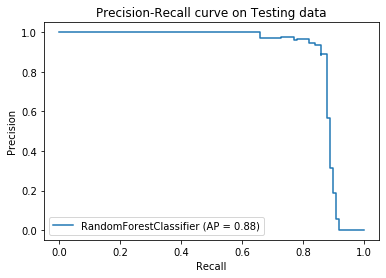

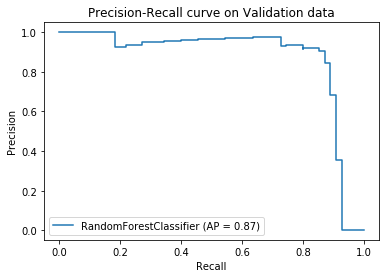

In [43]:
#fig, (ax1,ax2) = plt.subplots(1,2,figsize = (12,6))
dist1 = plot_precision_recall_curve(RF1,  X_test, Y_test)
dist1.ax_.set_title('Precision-Recall curve on Testing data')

dist2 = plot_precision_recall_curve(RF1,  X_val, Y_val)
dist2.ax_.set_title('Precision-Recall curve on Validation data')

ROC Curve for Testing and Validation datasets.

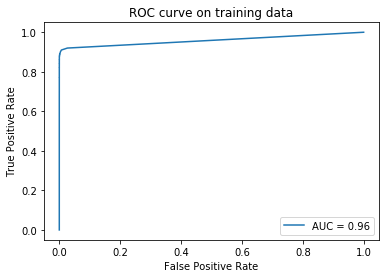

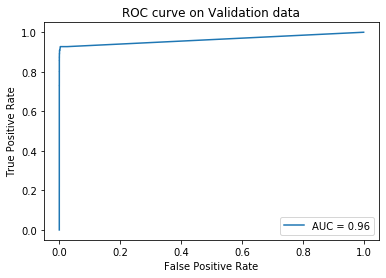

In [102]:
#roc for testing set
Y_Test_Prob_RF1 = RF1.predict_proba(X_test)[:,1]
fpr1, tpr1, _ = metrics.roc_curve(Y_test,  Y_Test_Prob_RF1)
auc1 = metrics.roc_auc_score(Y_test, Y_Test_Prob_RF1)
plt.title('ROC curve on training data')
plt.plot(fpr1, tpr1, label='AUC = %0.2f' % auc1)
plt.legend(loc = 'lower right')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.show()

#roc for Validataion set
Y_val_Prob_RF1 = RF1.predict_proba(X_val)[:,1]
fpr2, tpr2, _ = metrics.roc_curve(Y_val,  Y_val_Prob_RF1)
auc2 = metrics.roc_auc_score(Y_val, Y_val_Prob_RF1)
plt.title('ROC curve on Validation data')
plt.plot(fpr2, tpr2, label='AUC = %0.2f' % auc2)
plt.legend(loc = 'lower right')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.show()

-------------------------------------------------------
### XGBOOST After PREPROCESSING

In [45]:
XGB1 = xgb.XGBClassifier(n_estimators=1000,learning_rate = 0.1).fit(X_train, Y_train)
Y_Test_Pred_XGB1 = XGB1.predict(X_test)

Predicting targets on testing data and printing metrics

In [105]:
#metrix for XGBoost on test data

print("Accuracy of XGBoost on Testing data : ", accuracy_score(Y_test, Y_Test_Pred_XGB1))
print("Precision of XGBoost on Testing data : ", precision_score(Y_test, Y_Test_Pred_XGB1))
print("Recall of XGBoost on Testing data : ", recall_score(Y_test, Y_Test_Pred_XGB1))
print("F1 score of XGBoost on Testing data : ", f1_score(Y_test, Y_Test_Pred_XGB1))
print("Error rate of XGBoost on Testing data : ", 1 - accuracy_score(Y_test, Y_Test_Pred_XGB1))


print("Confusion matrix : \n", confusion_matrix(Y_test, Y_Test_Pred_XGB1))

Accuracy of XGBoost on Testing data :  0.999580756734095
Precision of XGBoost on Testing data :  0.9318181818181818
Recall of XGBoost on Testing data :  0.82
F1 score of XGBoost on Testing data :  0.8723404255319149
Error rate of XGBoost on Testing data :  0.0004192432659050338
Confusion matrix : 
 [[57140     6]
 [   18    82]]


Predicting targets on Validataion data and printing metrics

In [47]:
Y_val_Pred_XGB1 = XGB1.predict(X_val)

In [106]:
#metrix for XGBoost on Validataion data

print("Accuracy of XGBoost on Testing data : ", accuracy_score(Y_val, Y_val_Pred_XGB1))
print("Precision of XGBoost on Testing data : ", precision_score(Y_val, Y_val_Pred_XGB1))
print("Recall of XGBoost on Testing data : ", recall_score(Y_val, Y_val_Pred_XGB1))
print("F1 score of XGBoost on Testing data : ", f1_score(Y_val, Y_val_Pred_XGB1))
print("Error rate of XGBoost on Testing data : ", 1 - accuracy_score(Y_val, Y_val_Pred_XGB1))


print("Confusion matrix : \n", confusion_matrix(Y_val, Y_val_Pred_XGB1))

Accuracy of XGBoost on Testing data :  0.9996098875766926
Precision of XGBoost on Testing data :  0.9583333333333334
Recall of XGBoost on Testing data :  0.8363636363636363
F1 score of XGBoost on Testing data :  0.8932038834951457
Error rate of XGBoost on Testing data :  0.00039011242330744267
Confusion matrix : 
 [[28140     2]
 [    9    46]]


Area under Precision recall curve for Testing and Validation datasets.

Text(0.5, 1.0, 'Precision-Recall curve on Validation data')

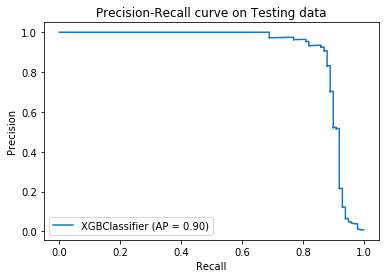

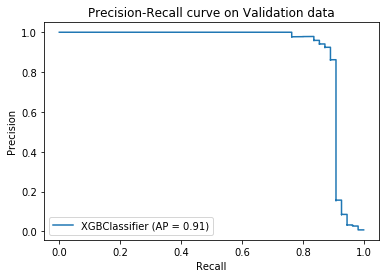

In [49]:
#fig, (ax1,ax2) = plt.subplots(1,2,figsize = (12,6))
dist1 = plot_precision_recall_curve(XGB1,  X_test, Y_test)
dist1.ax_.set_title('Precision-Recall curve on Testing data')

dist2 = plot_precision_recall_curve(XGB1,  X_val, Y_val)
dist2.ax_.set_title('Precision-Recall curve on Validation data')

ROC Curve for Testing and Validation datasets.

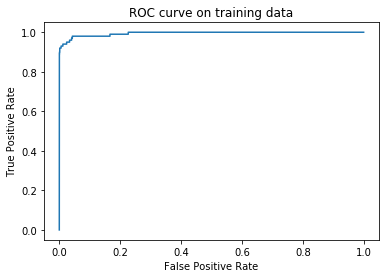

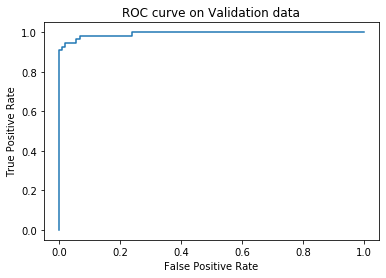

In [85]:
#roc for testing set
Y_Test_Prob_XGB1 = XGB1.predict_proba(X_test)[:,1]
fpr1, tpr1, _ = metrics.roc_curve(Y_test,  Y_Test_Prob_XGB1)
auc1 = metrics.roc_auc_score(Y_test, Y_Test_Prob_XGB1)
plt.title('ROC curve on training data')
plt.plot(fpr1, tpr1, label='AUC = %0.2f' % auc1)
#plt.legend(loc = 'lower right')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.show()

#roc for Validataion set
Y_val_Prob_XGB1 = XGB1.predict_proba(X_val)[:,1]
fpr2, tpr2, _ = metrics.roc_curve(Y_val,  Y_val_Prob_XGB1)
auc2 = metrics.roc_auc_score(Y_val, Y_val_Prob_XGB1)
plt.title('ROC curve on Validation data')
plt.plot(fpr2, tpr2, label='AUC = %0.2f' % auc2)
#plt.legend(loc = 'lower right')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.show()

--------------------------------------------------

# Random Over Sampling

In [50]:
X = df.drop(["Class"], axis=1)
Y = df["Class"].values

Spliting the data set:

Training set : 70%  ;  Validation set : 10%   ;   Testing set : 20%

In [51]:
#First spliting the data into 70% training and keeping the 30% in other
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=7)
#Spliting the other 30% data into testing 20% and validation 10%
X_test, X_val, Y_test, Y_val = train_test_split(X_test, Y_test, test_size=0.33, random_state=7)

Applying random over sampling on train data

In [52]:
RS_Over = RandomOverSampler(random_state=0)

X_train_resampled, Y_train_resampled = RS_Over.fit_resample(X_train, Y_train)

In [53]:
print(X_train_resampled.shape)
print(Y_train_resampled.shape)

(398054, 30)
(398054,)


------------------------------
RANDOM FOREST with Random Over Sampling

In [54]:
RF2 = RandomForestClassifier().fit(X_train_resampled, Y_train_resampled)

Predicting targets on testing data

In [55]:
Y_Test_Pred_RF2 = RF2.predict(X_test)

In [107]:
#metrix for Random Forest on test data
print("Accuracy of RANDOM FOREST on Testing data : ", accuracy_score(Y_test, Y_Test_Pred_RF2))
print("Precision of RANDOM FOREST on Testing data : ", precision_score(Y_test, Y_Test_Pred_RF2))
print("Recall of RANDOM FOREST on Testing data : ", recall_score(Y_test, Y_Test_Pred_RF2))
print("F1 score of RANDOM FOREST on Testing data : ", f1_score(Y_test, Y_Test_Pred_RF2))
print("Error rate of RANDOM FOREST on Testing data : ", 1 - accuracy_score(Y_test, Y_Test_Pred_RF2))


#CM_LR1 = confusion_matrix(Y_test, Y_Test_Pred1)
print("Confusion matrix : \n", confusion_matrix(Y_test, Y_Test_Pred_RF2))

Accuracy of RANDOM FOREST on Testing data :  0.999580756734095
Precision of RANDOM FOREST on Testing data :  0.9418604651162791
Recall of RANDOM FOREST on Testing data :  0.81
F1 score of RANDOM FOREST on Testing data :  0.8709677419354839
Error rate of RANDOM FOREST on Testing data :  0.0004192432659050338
Confusion matrix : 
 [[57141     5]
 [   19    81]]


Predicting targets on Validation data

In [57]:
Y_val_Pred_RF2 = RF2.predict(X_val)

In [108]:
#metrix for Random Forest on Validataion data

#Accuracy_LR1 = LR1.score(X_test, Y_test)
print("Accuracy of RANDOM FOREST on Testing data : ", accuracy_score(Y_val, Y_val_Pred_RF2))
print("Precision of RANDOM FOREST on Testing data : ", precision_score(Y_val, Y_val_Pred_RF2))
print("Recall of RANDOM FOREST on Testing data : ", recall_score(Y_val, Y_val_Pred_RF2))
print("F1 score of RANDOM FOREST on Testing data : ", f1_score(Y_val, Y_val_Pred_RF2))
print("Error rate of RANDOM FOREST on Testing data : ", 1 - accuracy_score(Y_val, Y_val_Pred_RF2))


#CM_LR1 = confusion_matrix(Y_test, Y_Test_Pred1)
print("Confusion matrix : \n", confusion_matrix(Y_val, Y_val_Pred_RF2))

Accuracy of RANDOM FOREST on Testing data :  0.9995034932794269
Precision of RANDOM FOREST on Testing data :  0.9183673469387755
Recall of RANDOM FOREST on Testing data :  0.8181818181818182
F1 score of RANDOM FOREST on Testing data :  0.8653846153846154
Error rate of RANDOM FOREST on Testing data :  0.0004965067205731089
Confusion matrix : 
 [[28138     4]
 [   10    45]]


Area under Precision recall curve for Testing and Validation datasets.

Text(0.5, 1.0, 'Precision-Recall curve on Validation data')

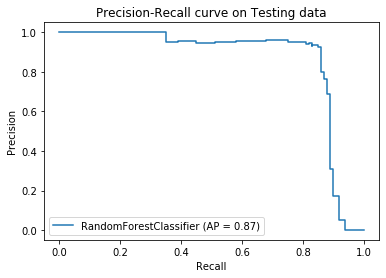

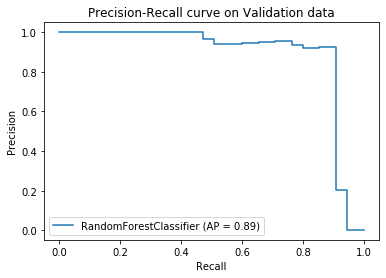

In [59]:
#fig, (ax1,ax2) = plt.subplots(1,2,figsize = (12,6))
dist1 = plot_precision_recall_curve(RF2,  X_test, Y_test)
dist1.ax_.set_title('Precision-Recall curve on Testing data')

dist2 = plot_precision_recall_curve(RF2,  X_val, Y_val)
dist2.ax_.set_title('Precision-Recall curve on Validation data')

ROC Curve for Testing and Validation datasets.

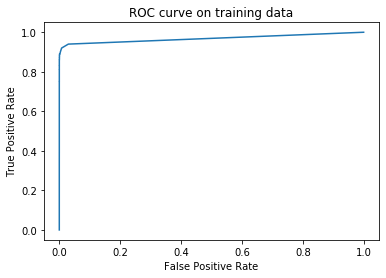

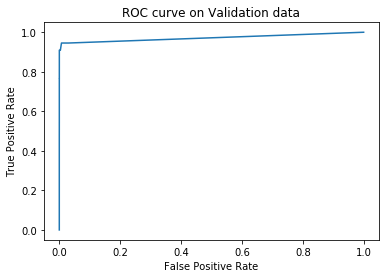

In [86]:
#roc for testing set
Y_Test_Prob_RF2 = RF2.predict_proba(X_test)[:,1]
fpr1, tpr1, _ = metrics.roc_curve(Y_test,  Y_Test_Prob_RF2)
auc1 = metrics.roc_auc_score(Y_test, Y_Test_Prob_RF2)
plt.title('ROC curve on training data')
plt.plot(fpr1, tpr1, label='AUC = %0.2f' % auc1)
#plt.legend(loc = 'lower right')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.show()

#roc for Validataion set
Y_val_Prob_RF2 = RF2.predict_proba(X_val)[:,1]
fpr2, tpr2, _ = metrics.roc_curve(Y_val,  Y_val_Prob_RF2)
auc2 = metrics.roc_auc_score(Y_val, Y_val_Prob_RF2)
plt.title('ROC curve on Validation data')
plt.plot(fpr2, tpr2, label='AUC = %0.2f' % auc2)
#plt.legend(loc = 'lower right')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.show()

-----------------------------
XGBoost with Random Over Sampling

In [60]:
XGB2 = xgb.XGBClassifier(n_estimators = 500, max_depth = 30, learning_rate = 0.1).fit(X_train_resampled, Y_train_resampled)

Predicting targets on testing data and printing metrics

In [61]:
Y_Test_Pred_XGB2 = XGB2.predict(X_test)

In [109]:
#metrix for XGBoost on test data

print("Accuracy of XGBoost on Testing data : ", accuracy_score(Y_test, Y_Test_Pred_XGB2))
print("Precision of XGBoost on Testing data : ", precision_score(Y_test, Y_Test_Pred_XGB2))
print("Recall of XGBoost on Testing data : ", recall_score(Y_test, Y_Test_Pred_XGB2))
print("F1 score of XGBoost on Testing data : ", f1_score(Y_test, Y_Test_Pred_XGB2))
print("Error rate of XGBoost on Testing data : ", 1 - accuracy_score(Y_test, Y_Test_Pred_XGB2))


print("Confusion matrix : \n", confusion_matrix(Y_test, Y_Test_Pred_XGB2))

Accuracy of XGBoost on Testing data :  0.9995458197952696
Precision of XGBoost on Testing data :  0.8854166666666666
Recall of XGBoost on Testing data :  0.85
F1 score of XGBoost on Testing data :  0.8673469387755102
Error rate of XGBoost on Testing data :  0.00045418020473042553
Confusion matrix : 
 [[57135    11]
 [   15    85]]


Predicting targets on Validataion data and printing metrics

In [110]:
Y_val_Pred_XGB2 = XGB2.predict(X_val)
#metrix for XGBoost on Validataion data

print("Accuracy of XGBoost on Testing data : ", accuracy_score(Y_val, Y_val_Pred_XGB2))
print("Precision of XGBoost on Testing data : ", precision_score(Y_val, Y_val_Pred_XGB2))
print("Recall of XGBoost on Testing data : ", recall_score(Y_val, Y_val_Pred_XGB2))
print("F1 score of XGBoost on Testing data : ", f1_score(Y_val, Y_val_Pred_XGB2))
print("Error rate of XGBoost on Testing data : ", 1 - accuracy_score(Y_val, Y_val_Pred_XGB2))


print("Confusion matrix : \n", confusion_matrix(Y_val, Y_val_Pred_XGB2))

Accuracy of XGBoost on Testing data :  0.9996098875766926
Precision of XGBoost on Testing data :  0.94
Recall of XGBoost on Testing data :  0.8545454545454545
F1 score of XGBoost on Testing data :  0.8952380952380952
Error rate of XGBoost on Testing data :  0.00039011242330744267
Confusion matrix : 
 [[28139     3]
 [    8    47]]


Text(0.5, 1.0, 'Precision-Recall curve on Validation data')

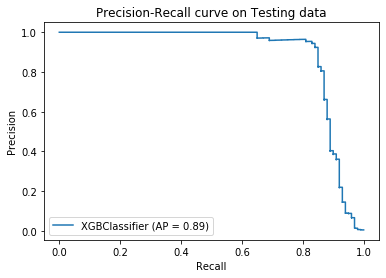

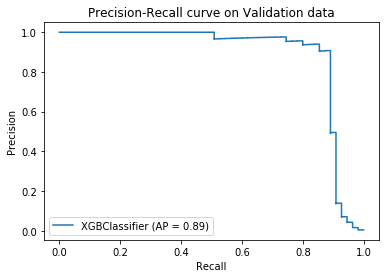

In [64]:
#fig, (ax1,ax2) = plt.subplots(1,2,figsize = (12,6))
dist1 = plot_precision_recall_curve(XGB2,  X_test, Y_test)
dist1.ax_.set_title('Precision-Recall curve on Testing data')

dist2 = plot_precision_recall_curve(XGB2,  X_val, Y_val)
dist2.ax_.set_title('Precision-Recall curve on Validation data')

ROC Curve for Testing and Validation datasets.

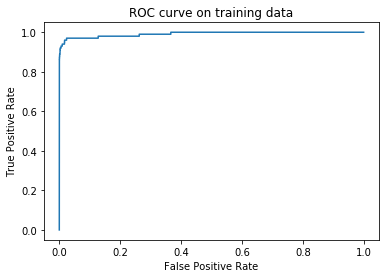

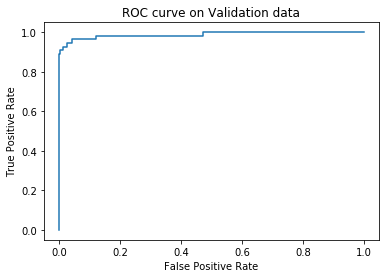

In [87]:
#roc for testing set
Y_Test_Prob_XGB2 = XGB2.predict_proba(X_test)[:,1]
fpr1, tpr1, _ = metrics.roc_curve(Y_test,  Y_Test_Prob_XGB2)
auc1 = metrics.roc_auc_score(Y_test, Y_Test_Prob_XGB2)
plt.title('ROC curve on training data')
plt.plot(fpr1, tpr1, label='AUC = %0.2f' % auc1)
#plt.legend(loc = 'lower right')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.show()

#roc for Validataion set
Y_val_Prob_XGB2 = XGB2.predict_proba(X_val)[:,1]
fpr2, tpr2, _ = metrics.roc_curve(Y_val,  Y_val_Prob_XGB2)
auc2 = metrics.roc_auc_score(Y_val, Y_val_Prob_XGB2)
plt.title('ROC curve on Validation data')
plt.plot(fpr2, tpr2, label='AUC = %0.2f' % auc2)
#plt.legend(loc = 'lower right')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.show()

## SMOTE

In [65]:
X = df.drop(["Class"], axis=1)
Y = df["Class"].values

In [66]:
#First spliting the data into 70% training and keeping the 30% in other
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=7)
#Spliting the other 30% data into testing 20% and validation 10%
X_test, X_val, Y_test, Y_val = train_test_split(X_test, Y_test, test_size=0.33, random_state=7)

Appliying smote on Training data

In [67]:
X_train_smote, Y_train_smote = SMOTE(random_state =7).fit_sample(X_train, Y_train)

In [68]:
print(X_train_smote.shape)
print(Y_train_smote.shape)

(398054, 30)
(398054,)


----------------------------
RANDOM FOREST with SMOTE

In [69]:
RF3 = RandomForestClassifier().fit(X_train_smote, Y_train_smote)

Predicting targets on testing data

In [70]:
Y_Test_Pred_RF3 = RF3.predict(X_test)

In [114]:
#metrix for Random Forest on test data

#Accuracy_LR1 = LR1.score(X_test, Y_test)
print("Accuracy of Random Forest on Testing data : ", accuracy_score(Y_test, Y_Test_Pred_RF3))
print("Precision of Random Forest on Testing data : ", precision_score(Y_test, Y_Test_Pred_RF3))
print("Recall of Random Forest on Testing data : ", recall_score(Y_test, Y_Test_Pred_RF3))
print("F1 score of Random Forest on Testing data : ", f1_score(Y_test, Y_Test_Pred_RF3))
print("Error rate of Random Forest on Testing data : ", 1 - accuracy_score(Y_test, Y_Test_Pred_RF3))

#CM_LR1 = confusion_matrix(Y_test, Y_Test_Pred1)
print("Confusion matrix : \n", confusion_matrix(Y_test, Y_Test_Pred_RF3))

Accuracy of Random Forest on Testing data :  0.9994410089787933
Precision of Random Forest on Testing data :  0.84
Recall of Random Forest on Testing data :  0.84
F1 score of Random Forest on Testing data :  0.8399999999999999
Error rate of Random Forest on Testing data :  0.0005589910212067117
Confusion matrix : 
 [[57130    16]
 [   16    84]]


Predicting targets on Validation data

In [113]:
Y_val_Pred_RF3 = RF3.predict(X_val)
#metrix for Random Forest on Validataion data

#Accuracy_LR1 = LR1.score(X_test, Y_test)
print("Accuracy of Random Forest on Testing data : ", accuracy_score(Y_val, Y_val_Pred_RF3))
print("Precision of Random Forest on Testing data : ", precision_score(Y_val, Y_val_Pred_RF3))
print("Recall of Random Forest on Testing data : ", recall_score(Y_val, Y_val_Pred_RF3))
print("F1 score of Random Forest on Testing data : ", f1_score(Y_val, Y_val_Pred_RF3))
print("Error rate of Random Forest on Testing data : ", 1 - accuracy_score(Y_val, Y_val_Pred_RF3))


#CM_LR1 = confusion_matrix(Y_test, Y_Test_Pred1)
print("Confusion matrix : \n", confusion_matrix(Y_val, Y_val_Pred_RF3))

Accuracy of Random Forest on Testing data :  0.9995744228109373
Precision of Random Forest on Testing data :  0.8909090909090909
Recall of Random Forest on Testing data :  0.8909090909090909
F1 score of Random Forest on Testing data :  0.8909090909090909
Error rate of Random Forest on Testing data :  0.00042557718906266473
Confusion matrix : 
 [[28136     6]
 [    6    49]]


Area under Precision recall curve for Testing and Validation datasets.

Text(0.5, 1.0, 'Precision-Recall curve on Validation data')

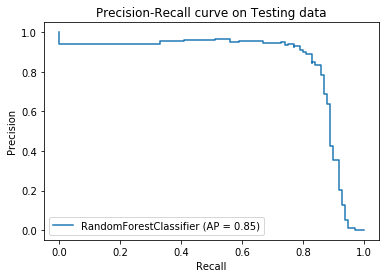

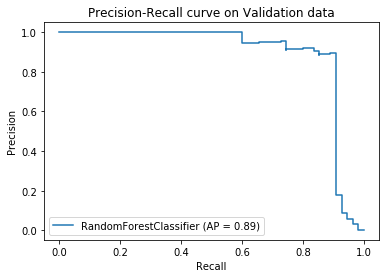

In [73]:
#fig, (ax1,ax2) = plt.subplots(1,2,figsize = (12,6))
dist1 = plot_precision_recall_curve(RF3, X_test, Y_test)
dist1.ax_.set_title('Precision-Recall curve on Testing data')

dist2 = plot_precision_recall_curve(RF3, X_val, Y_val)
dist2.ax_.set_title('Precision-Recall curve on Validation data')

ROC Curve for Testing and Validation datasets.

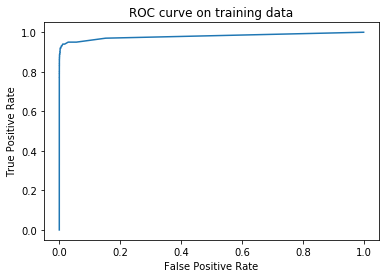

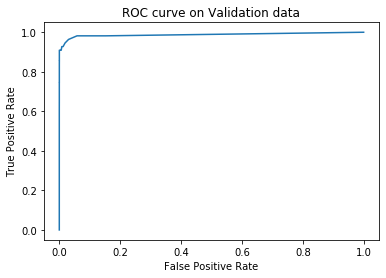

In [88]:
#ROC Curve for Testing and Validation datasets.
#roc for testing set
Y_Test_Prob_RF3 = RF3.predict_proba(X_test)[:,1]
fpr1, tpr1, _ = metrics.roc_curve(Y_test,  Y_Test_Prob_RF3)
auc1 = metrics.roc_auc_score(Y_test, Y_Test_Prob_RF3)
plt.title('ROC curve on training data')
plt.plot(fpr1, tpr1, label='AUC = %0.2f' % auc1)
#plt.legend(loc = 'lower right')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.show()

#roc for Validataion set
Y_val_Prob_RF3 = RF3.predict_proba(X_val)[:,1]
fpr2, tpr2, _ = metrics.roc_curve(Y_val,  Y_val_Prob_RF3)
auc2 = metrics.roc_auc_score(Y_val, Y_val_Prob_RF3)
plt.title('ROC curve on Validation data')
plt.plot(fpr2, tpr2, label='AUC = %0.2f' % auc2)
#plt.legend(loc = 'lower right')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.show()

----------------------------
XGBOOST with SMOTE

In [74]:
XGB3 = xgb.XGBClassifier(n_estimators = 500, max_depth = 30, learning_rate = 0.1).fit(X_train_smote, Y_train_smote)

Predicting targets on testing data and printing metrics

In [112]:
Y_Test_Pred_XGB3 = XGB3.predict(X_test)
#metrix for XGBoost on test data

print("Accuracy of XGBoost on Testing data : ", accuracy_score(Y_test, Y_Test_Pred_XGB3))
print("Precision of XGBoost on Testing data : ", precision_score(Y_test, Y_Test_Pred_XGB3))
print("Recall of XGBoost on Testing data : ", recall_score(Y_test, Y_Test_Pred_XGB3))
print("F1 score of XGBoost on Testing data : ", f1_score(Y_test, Y_Test_Pred_XGB3))
print("Error rate of XGBoost on Testing data : ", 1 - accuracy_score(Y_test, Y_Test_Pred_XGB3))

print("Confusion matrix : \n", confusion_matrix(Y_test, Y_Test_Pred_XGB3))

Accuracy of XGBoost on Testing data :  0.999336198162317
Precision of XGBoost on Testing data :  0.7818181818181819
Recall of XGBoost on Testing data :  0.86
F1 score of XGBoost on Testing data :  0.819047619047619
Error rate of XGBoost on Testing data :  0.0006638018376829979
Confusion matrix : 
 [[57122    24]
 [   14    86]]


Predicting targets on Validataion data and printing metrics

In [111]:
Y_val_Pred_XGB3 = XGB3.predict(X_val)
#metrix for XGBoost on Validataion data

print("Accuracy of XGBoost on Testing data : ", accuracy_score(Y_val, Y_val_Pred_XGB3))
print("Precision of XGBoost on Testing data : ", precision_score(Y_val, Y_val_Pred_XGB3))
print("Recall of XGBoost on Testing data : ", recall_score(Y_val, Y_val_Pred_XGB3))
print("F1 score of XGBoost on Testing data : ", f1_score(Y_val, Y_val_Pred_XGB3))
print("Error rate of XGBoost on Testing data : ", 1 - accuracy_score(Y_val, Y_val_Pred_XGB3))

print("Confusion matrix : \n", confusion_matrix(Y_val, Y_val_Pred_XGB3))

Accuracy of XGBoost on Testing data :  0.9993261694506508
Precision of XGBoost on Testing data :  0.8
Recall of XGBoost on Testing data :  0.8727272727272727
F1 score of XGBoost on Testing data :  0.8347826086956521
Error rate of XGBoost on Testing data :  0.0006738305493492192
Confusion matrix : 
 [[28130    12]
 [    7    48]]


Area under Precision recall curve for Testing and Validation datasets.

Text(0.5, 1.0, 'Precision-Recall curve on Validation data')

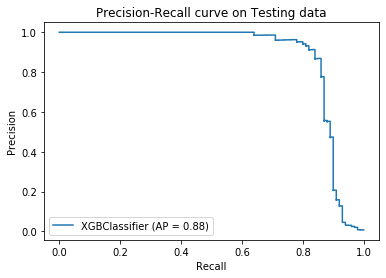

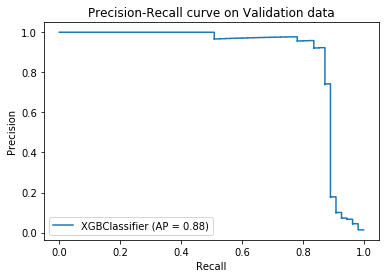

In [77]:
#fig, (ax1,ax2) = plt.subplots(1,2,figsize = (12,6))
dist1 = plot_precision_recall_curve(XGB3, X_test, Y_test)
dist1.ax_.set_title('Precision-Recall curve on Testing data')

dist2 = plot_precision_recall_curve(XGB3, X_val, Y_val)
dist2.ax_.set_title('Precision-Recall curve on Validation data')

ROC Curve for Testing and Validation datasets.

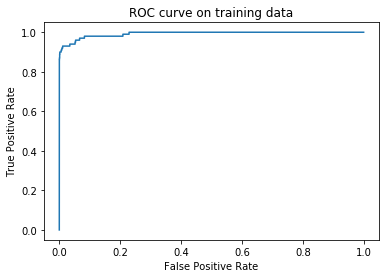

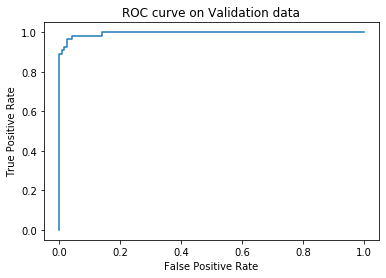

In [89]:
#roc for testing set
Y_Test_Prob_XGB3 = XGB3.predict_proba(X_test)[:,1]
fpr1, tpr1, _ = metrics.roc_curve(Y_test,  Y_Test_Prob_XGB3)
auc1 = metrics.roc_auc_score(Y_test, Y_Test_Prob_XGB3)
plt.title('ROC curve on training data')
plt.plot(fpr1, tpr1, label='AUC = %0.2f' % auc1)
#plt.legend(loc = 'lower right')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.show()

#roc for Validataion set
Y_val_Prob_XGB3 = XGB3.predict_proba(X_val)[:,1]
fpr2, tpr2, _ = metrics.roc_curve(Y_val,  Y_val_Prob_XGB3)
auc2 = metrics.roc_auc_score(Y_val, Y_val_Prob_XGB3)
plt.title('ROC curve on Validation data')
plt.plot(fpr2, tpr2, label='AUC = %0.2f' % auc2)
#plt.legend(loc = 'lower right')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.show()

### Conclusion from Supervised learning:
            
    Results after preprocessing:

         Random Forest  results on testing data        = Acc: 99.96%  ; f1-score:  0.89  ;  AUPRC: 0.88
         Random Forest  results on Validataion data    = Acc: 99.95%  ; f1-score:  0.88  ;  AUPRC: 0.87

         XGBoost results on testing data               = Acc: 99.95%  ; f1-score: 0.87  ;  AUPRC : 0.90
         XGBoost results on Validation data            = Acc: 99.96%  ; f1-score: 0.89  ;  AUPRC : 0.91
            
    Results using Random Over Sampling:
       
        Random Forest   results on testing data        = Acc: 99.95%  ; f1-score: 0.87 ; AUPRC: 0.87
        Random Forest  results on Validataion data     = Acc: 99.95%  ; f1-score: 0.87 ; AUPRC: 0.89

        XGBoost  results on testing data               = Acc: 99.95% ; f1-score: 0.87  ; AUPRC: 0.89
	    XGBoost results on Validation data             = Acc: 99.96% ; f1-score: 0.895 ; AUPRC: 0.89

    Results using SMOTE:
        
        Random Forest  results on testing data        = Acc: 99.94%  ; f1-score: 0.84 ; AUPRC: 0.85
        Random Forest  results on Validataion data    = Acc: 99.96%  ; f1-score: 0.89 ; AUPRC: 0.89

        XGBoost results on testing data               = Acc: 99.93%  ; f1-score: 0.82 ; AUPRC: 0.88
        XGBoost results on Validation data            = Acc: 99.93%  ; f1-score: 0.83 ; AUPRC: 0.88

# UNSUPERVISED ANOMOLY DETECTION

Finding anomoly/ outliers in the dataset. In the given set the fraud transactions are outliers.
Two methods I choosed to detect ouliers are LOF and Isolation Forest

Local Outlier Factor: computes the local density deviation of a given data point with respect
to its neighbors.

In [90]:
Normal_NonFraud = df[df.Class==0]
Normal = Normal_NonFraud.drop(['Class'], axis=1)

Outliers_Fraud = df[df.Class==1]
Outliers = Outliers_Fraud.drop(['Class'], axis=1)

print(Normal.shape)
print(Outliers.shape)

(284315, 30)
(492, 30)


In [91]:
lof = LocalOutlierFactor(n_neighbors=20, algorithm='auto', leaf_size=30, metric='minkowski', p=2, metric_params=None, contamination='auto', novelty=True, n_jobs=None)
LOF = lof.fit(Normal)

In [92]:
Normal_LOF = LOF.predict(Normal)
Outliers_LOF = LOF.predict(Outliers)

In [93]:
Normal_Accuracy = np.round((list(Normal_LOF).count(1))/Normal_LOF.shape[0] , 4)

In [94]:
Outliers_Accuracy = np.round((list(Outliers_LOF).count(-1))/Outliers_LOF.shape[0] , 4)

In [95]:
print("Accuracy detecting Non_Fraud :", Normal_Accuracy)
print("Accuracy detecting Fraud or Outliers:", Outliers_Accuracy)

Accuracy detecting Non_Fraud : 0.9586
Accuracy detecting Fraud or Outliers: 0.2317


From above we can see the LOF predicted Non-fraud transactions correctl for 95.86% time and Fraud transactions only 23.17%

# IsolationForest

IsolationForest: In this method it isolates transactions by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.

In [96]:
Normal_NonFraud = df[df.Class==0]
Normal = Normal_NonFraud.drop(['Class'], axis=1)

Outliers_Fraud = df[df.Class==1]
Outliers = Outliers_Fraud.drop(['Class'], axis=1)

print(Normal.shape)
print(Outliers.shape)

(284315, 30)
(492, 30)


In [97]:
ISF = IsolationForest(random_state=7)
ISF.fit(Normal)

IsolationForest(random_state=7)

In [98]:
Normal_ISF = ISF.predict(Normal)
Outliers_ISF = ISF.predict(Outliers)

In [99]:
Normal_Accuracy_ISF = np.round((list(Normal_ISF).count(1))/Normal_ISF.shape[0] , 4)

In [100]:
Outliers_Accuracy_ISF = np.round((list(Outliers_ISF).count(-1))/Outliers_ISF.shape[0] , 4)

In [101]:
print("Accuracy detecting Non_Fraud by Isolation Forest :", Normal_Accuracy_ISF)
print("Accuracy detecting Fraud or Outliers by Isolation Forest:", Outliers_Accuracy_ISF)

Accuracy detecting Non_Fraud by Isolation Forest : 0.9611
Accuracy detecting Fraud or Outliers by Isolation Forest: 0.8374


From above we can see the Isolation Forest predicted Non-fraud transactions correctly for 96% time and Fraud transactions 83.7% which is very good compared to LOF.